# OpenCV

**"A library of programming functions mainly aimed at real-time computer vision"**



## Pregled
* Osnovne operacije sa slikom
* Crtanje slike
* Prostori boja
* Jednostavne transformacije
* Thresholdovanje
* Konvolucije
* Morfološke transformacije
* Bounding box
* Rad sa videom, background subtraction
* Rad sa kamerom, color finder

## Uvod
* OpenCV je jedna od najkorišćenijih biblioteka za *computer vision* - pisana je u C++ ali su naknadno napisani interfejsi za još nekoliko jezika, uključujući i Python
* Iako sadrži neke tehnike mašinskog učenja, OpenCV nam je uglavnom koristan u procesu pretprocesiranja i pripreme podataka, kao i za implementaciju okolnih funkcionalnosti koje uz dobar ML model mogu da čine funkcionalnu aplikaciju
* **Napomena**: Funkcija za prikaz slike (`cv2.imshow`) ne funkcioniše u Google Colab, pa koristimo posebnu funkciju `google.colab.patches.cv2_imshow` - u slučaju pokretanja ovog koda kao py kod preći na `cv2.imshow`
* **Napomena**: Komunikacija sa web kamerom ne funkcioniše u Google Colab, kopirati taj blok koda u `.py` fajl i pokrenuti lokalno

## Import

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
print(cv2.__version__)

path_to_data = "./"

# Definisemo funkciju za prikaz slike
# (imshow + zaustavljanje rada programa do pritiska tastera)
def show_local(img):
  cv2.imshow("img", img)
  cv2.waitKey(0)
    
# Ovo ne funkcionise u collab pa koristimo patch
from google.colab.patches import cv2_imshow
def show(img):
  cv2_imshow(img)
  print()

3.4.3


## Osnovne operacije sa slikom

Shape:  (512, 512, 3)
Size:  786432
Type:  uint8
Pixel (100,100):  [ 78  68 178]
Pixel (10, 10) - B kanal:  113


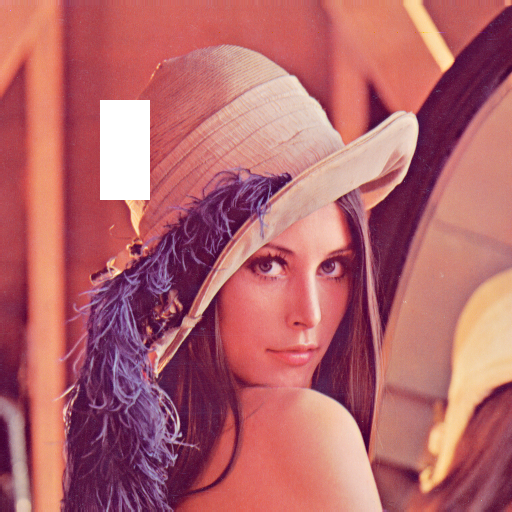

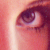

In [32]:
# Ucitavanje slike
img = cv2.imread(path_to_data + 'lena.png')  # (B, G, R)

print('Shape: ', img.shape)
print('Size: ', img.size)
print('Type: ', img.dtype)
print('Pixel (100,100): ', img[100, 100])

# Izmena slike: standardna numpy sintaksa
img[100, 100] = [255, 255, 255]
img[100:200, 100:150] = [255, 255, 255]

# Brze metode za pristup pikselima i izmenu slike: item/itemset
print('Pixel (10, 10) - B kanal: ', img.item(10, 10, 0))  # B kanal
img.itemset((10, 10, 0), 255)

show(img)

### Izdvajanje ROI (region of interest)
eye = img[250:300, 300:350]

show(eye)

## Crtanje slike

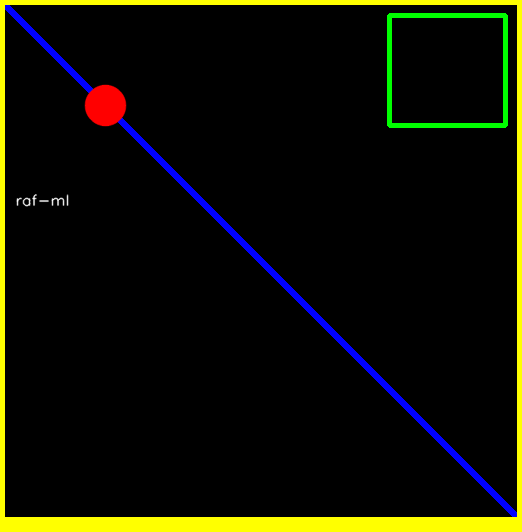

In [29]:
# Kreiramo praznu crnu RGB sliku 512x512
draw = np.zeros((512, 512, 3), np.uint8)

# Crtamo plavu dijagonalnu liniju sirine 5 od coska do coska
draw = cv2.line(draw, (0, 0), (511, 511), (255, 0, 0), 5)

# Crtamo zeleni pravougaonik na zadatim koordinatama
draw = cv2.rectangle(draw, (384, 10), (500, 120), (0, 255, 0), 3)

# Crtamo crveni krug 
draw = cv2.circle(draw, (100, 100), 20, (0, 0, 255), -1, cv2.LINE_AA)

# Crtamo beo tekst
font = cv2.FONT_HERSHEY_SIMPLEX
draw = cv2.putText(draw, 'raf-ml', (10, 200), font, 0.5, (255, 255, 255), 
                   1, cv2.LINE_AA)

# Crtamo zuti okvir sirine 5 tj. 15
draw = cv2.copyMakeBorder(draw, 5, 15, 5, 5, cv2.BORDER_CONSTANT, value=[0, 255, 255])

show(draw)

## Prostori boja

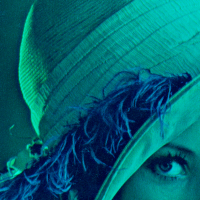

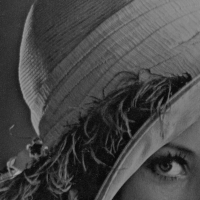


Grayscale shape:  (512, 512)


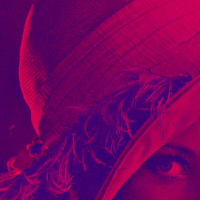

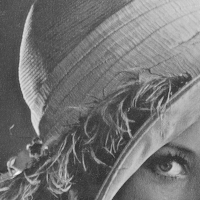

In [38]:
img = cv2.imread(path_to_data + 'lena.png')

# Razdvajamo BGR sliku na kanale (i ponovo spajamo)
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

# Anuliramo crveni kanal
img[:, :, 2] = 0
show(img[100:300, 100:300])

# Pretvaramo sliku u grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray[100:300, 100:300])
print('Grayscale shape: ', gray.shape)

# Cuvamo sliku na disk
cv2.imwrite(path_to_data + 'lena_gray.png', gray)

# HSV prostor: Hue Saturation Value
# Hue - nijansa u [0, 180]
# Saturation - saturacija, "zasicenost bojom"
# Value - kolicina boje, od crne ka beloj
# Prikaz: https://i.stack.imgur.com/gyuw4.png
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:, :, 1] = 0  # desaturacija
show(hsv[100:300, 100:300])  # Pogresno, tumacimo Hue kao Blue kanal itd.
img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
show(img[100:300, 100:300])  # Tacno

# YCrCb, jos jedan od prostora (luminance, bluediff, reddiff)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

## Jednostavne transformacije

In [0]:
# Utility funkcija za crtanje vise slika side-by-side
# Images je dict ime:slika
# Pyplot koristi (RGB) slike pa moramo izvrsiti BGR->RGB konverziju
def show_more(images):
  n = len(images)
  i = 0
  for k, v in images.items():
    if len(v.shape) == 3 and v.shape[2] == 3:
      v = cv2.cvtColor(v, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, n, i+1)
    i += 1
    
    if len(v.shape) == 3 and v.shape[2] == 3:
      plt.imshow(v)
    else:
      plt.imshow(v, "gray")
      
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
  plt.show()

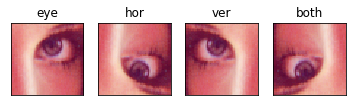

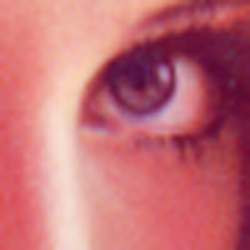

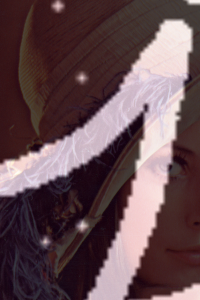

In [86]:
img = cv2.imread(path_to_data + 'lena.png')
eye = img[250:300, 300:350]

hor_eye = cv2.flip(eye, 0)
ver_eye = cv2.flip(eye, 1)
both_eye = cv2.flip(eye, -1)
show_more({'eye': eye, 'hor': hor_eye, 'ver': ver_eye, 'both': both_eye})

# Metode interpolacije:
# INTER_NEAREST - najblizi piksel
# INTER_LINEAR - bilinearna interpolacija
# INTER_CUBIC - bicubic interpolacija 4x4
res = cv2.resize(eye, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
show(res)

# Blending dve slike
img1 = cv2.imread('j.png')[100:400, 100:300, :]
img2 = cv2.imread('lena.png')[100:400, 100:300, :]
blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
show(blended)

## Thresholdovanje
[Dokumentacija svih metoda thresholdovanja](https://docs.opencv.org/3.0-alpha/modules/imgproc/doc/miscellaneous_transformations.html?highlight=thresh_tozero_inv#threshold
)

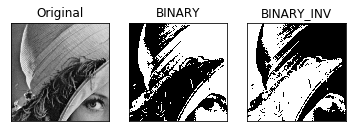

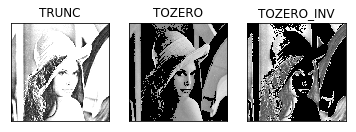

In [77]:
# Jednostavno: ako je vrednost piksela veca/manja od A postaviti na B
# Ulazna slka mora biti grayscale

img = cv2.imread(path_to_data + 'lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# BINARY: sve preko 127 postaje belo
# BINARY_INV: sve ispod 127 postaje belo
# TRUNC: sve preko 127 postaje 127
# TOZERO: sve ispod 127 ide u 0
# TOZERO_INV: sve preko 127 ide u 0
# Nastaju binary slike
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

images = {
  'Original': img[100:300, 100:300],
  'BINARY': thresh1[100:300, 100:300],
  'BINARY_INV': thresh2[100:300, 100:300],
}
show_more(images)

images = {
  'TRUNC': thresh3[100:300, 100:300],
  'TOZERO': thresh4[100:300, 100:300],
  'TOZERO_INV': thresh5[100:300, 100:300],
}
show_more(images)

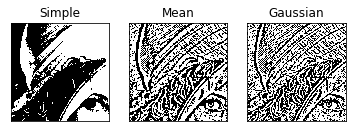

In [79]:
# Napredno: kao granica se koristi prosek u kvadratu oko piksela
# ili tezinski izracunat prosek po gausovoj raspodeli

img = cv2.imread(path_to_data + 'lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Kao granicu koristi prosek u kvadratu 11x11 umanjen za 2
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Kao granicu koristi tezniski prosek (po 2D centriranoj gausovoj raspodeli) u kvadratu 11x11 umanjen za 2
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

show_more({
  'Simple': thresh1[100:300, 100:300],
  'Mean': thresh2[100:300, 100:300],
  'Gaussian': thresh3[100:300, 100:300]
})

## Konvolucije
Primena konvolucije na sliku sa fiksnim kernelima, o čemu je bilo reči u toku priče o CNN


[Neki primeri](https://en.wikipedia.org/wiki/Kernel_(image_processing))

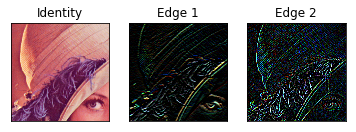

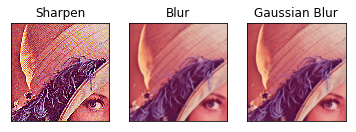

In [78]:
kernel_identity = np.asarray([
  [0, 0, 0],
  [0, 1, 0],
  [0, 0, 0]
])
kernel_edge1 = np.asarray([
  [-1, -1, -1],
  [0, 0, 0],
  [1, 1, 1]
])
kernel_edge2 = np.asarray([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])
kernel_sharpen = np.asarray([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])
kernel_blur = np.ones((3, 3), np.float32)/9
kernel_gaussian_blur = np.asarray([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1]
])/16


img = cv2.imread(path_to_data + 'lena.png')
show_more({
  'Identity': img[100:300, 100:300],
  'Edge 1': cv2.filter2D(img, -1, kernel_edge1)[100:300, 100:300],
  'Edge 2': cv2.filter2D(img, -1, kernel_edge2)[100:300, 100:300]
})
show_more({
  'Sharpen': cv2.filter2D(img, -1, kernel_sharpen)[100:300, 100:300],
  'Blur': cv2.filter2D(img, -1, kernel_blur)[100:300, 100:300],
  'Gaussian Blur': cv2.filter2D(img, -1, kernel_gaussian_blur)[100:300, 100:300]
})


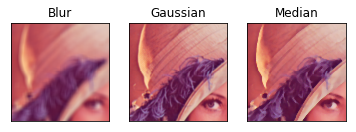

In [80]:
# Gotove funkcije za blur
img = cv2.imread(path_to_data + 'lena.png')

blur1 = cv2.blur(img, (10, 10))
blur2 = cv2.GaussianBlur(img, (5, 5), 0)
blur3 = cv2.medianBlur(img, 5)
show_more({
  'Blur': blur1[100:300, 100:300],
  'Gaussian': blur2[100:300, 100:300],
  'Median': blur3[100:300, 100:300]
})

## Morfološke transformacije

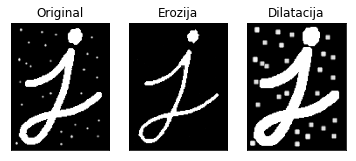

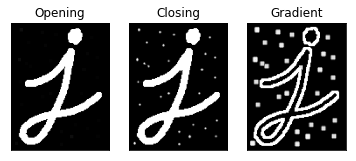

In [84]:
# Operacije na binarnim slikama

# Osnovna: erozija (piksel je True ako su svi pikseli u prozoru True)
# Osnovna: dilatacija (piskel je True ako je bar jedan piksel u prozoru True)

# Korisno za denoise: "opening" (erozija pa dilatacija)
# Obrnuto je "closing" i korisno je za "zatvaranje rupa"

# Morfoloski gradijent: razlika izmedju dilate i erode
img = cv2.imread(path_to_data + 'j.png')
kernel = np.ones((5, 5), np.uint8)

th1 = cv2.erode(img, kernel, iterations = 3)
th2 = cv2.dilate(img, kernel, iterations = 3)
th3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=3)
th4 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)
th5 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel, iterations=3)

show_more({
  'Original': img,
  'Erozija': th1,
  'Dilatacija': th2
})
show_more({
  'Opening': th3,
  'Closing': th4,
  'Gradient': th5
})


## Bounding box

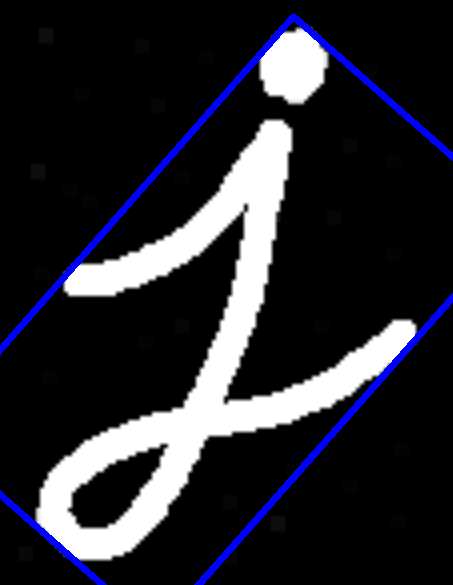

In [88]:
img = cv2.imread('j.png')
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8), iterations=3)

white_pixels = np.where(img == 255)
coords = np.column_stack((white_pixels[1], white_pixels[0]))
rect = cv2.minAreaRect(coords)
box = np.int0(np.around(cv2.boxPoints(rect)))
cv2.drawContours(img, [box],0,255,5)
show(img)

## Rad sa videom, background subtraction
- **Pokrenuti u lokalu!**

In [0]:
import cv2
import numpy as np

cap = cv2.VideoCapture('./vtest.avi')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
  # Dohvatamo naredni frame
  ret, frame = cap.read()
  
  #cv2.imshow('frame', frame)

  # Uklanjanje pozadine
  fgmask = fgbg.apply(frame)
  cv2.imshow('frame', fgmask)

  # Gasimo prozor pri pritisku ESC
  k = cv2.waitKey(30) & 0xff
  if k == 27:
      break

# Obavezno zatvaranje
cap.release()
cv2.destroyAllWindows()

## Rad sa kamerom, color finder
- **Pokrenuti u lokalu!**

In [0]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
  # Dohvatamo naredni frame sa kamere
  _, frame = cap.read()
  
  # BGR->HSV
  # Koristicemo HSV prostor da pronadjemo samo plavu boju
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

  # Granice za plavu boju
  # Podsetnik: https://i.stack.imgur.com/gyuw4.png
  lower_blue = np.array([110,120,50])
  upper_blue = np.array([130,255,255])

  # Malo komplikovanije za crvenu boju
  # mask1 = cv2.inRange(hsv, (0, 50, 20), (5, 255, 255))
  # mask2 = cv2.inRange(hsv, (175, 50, 20), (180, 255, 255))
  # mask = cv2.bitwise_or(mask1, mask2) 

  # Maskiranje slike
  mask = cv2.inRange(hsv, lower_blue, upper_blue)
  res = cv2.bitwise_and(frame, frame, mask=mask)

  cv2.imshow('saturation', hsv[:,:,1])
  cv2.imshow('frame', frame)
  cv2.imshow('mask', mask)
  cv2.imshow('res', res)
  
  # ESC
  k = cv2.waitKey(5) & 0xFF
  if k == 27:
      break

# Zatvaranje
cv2.destroyAllWindows()

## Resursi

- [Zvanična OpenCV dokumentacija](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
- Sama dokumentacija funkcija nije toliko dobra, ali postoji veliki broj gotovih tutoriala koji uvode neke od mnogobrojnih algoritama/tehnika prisutnih u OpenCV
- Neke od njih koje nismo stigli danas da obradimo:
  - [Konture](https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html)
  - [Pronalaženje linija](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html#hough-lines)
  - [Izdvajanje prednjeg plana (GrabCut)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html#grabcut)
  - [Segmentacija slike (watershed)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html)
- [Odličan blog za Computer Vision sa dosta tutoriala i primera: pyimagesearch.com](https://www.pyimagesearch.com/)